In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("NFLX.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['DateOrdinal'] = df['Date'].map(pd.Timestamp.toordinal)

In [4]:
X = df[['DateOrdinal']].values
y = df[['Close']].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)

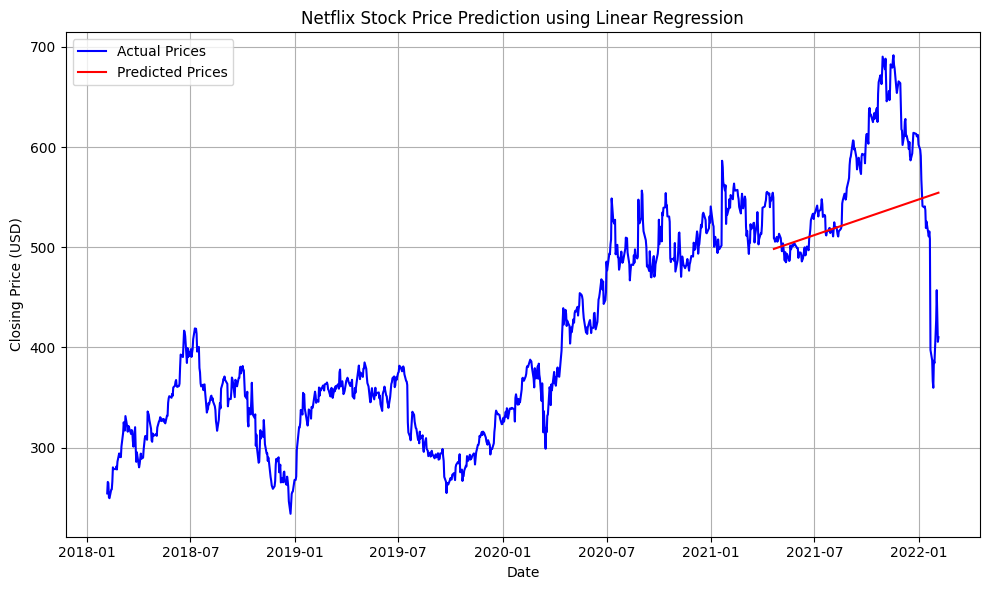

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], y, label='Actual Prices', color='blue')
plt.plot(df['Date'].iloc[len(X_train):], y_pred, label='Predicted Prices', color='red')
plt.title("Netflix Stock Price Prediction using Linear Regression")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
print(f"Intercept (θ₀): {model.intercept_[0]:.2f}")
print(f"Slope     (θ₁): {model.coef_[0][0]:.8f}")
print(f"R² Score        : {r2_score(y_test, y_pred):.4f}")
print(f"RMSE (Error)    : {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

Intercept (θ₀): -142822.27
Slope     (θ₁): 0.19422741
R² Score        : -0.0906
RMSE (Error)    : 73.4975


In [10]:
from datetime import timedelta

# Step 9: Predict Future Prices (next 30 days)
last_date = df['Date'].max()
future_dates = [last_date + timedelta(days=i) for i in range(1, 31)]
future_ordinals = np.array([date.toordinal() for date in future_dates]).reshape(-1, 1)

In [11]:
future_predictions = model.predict(future_ordinals)

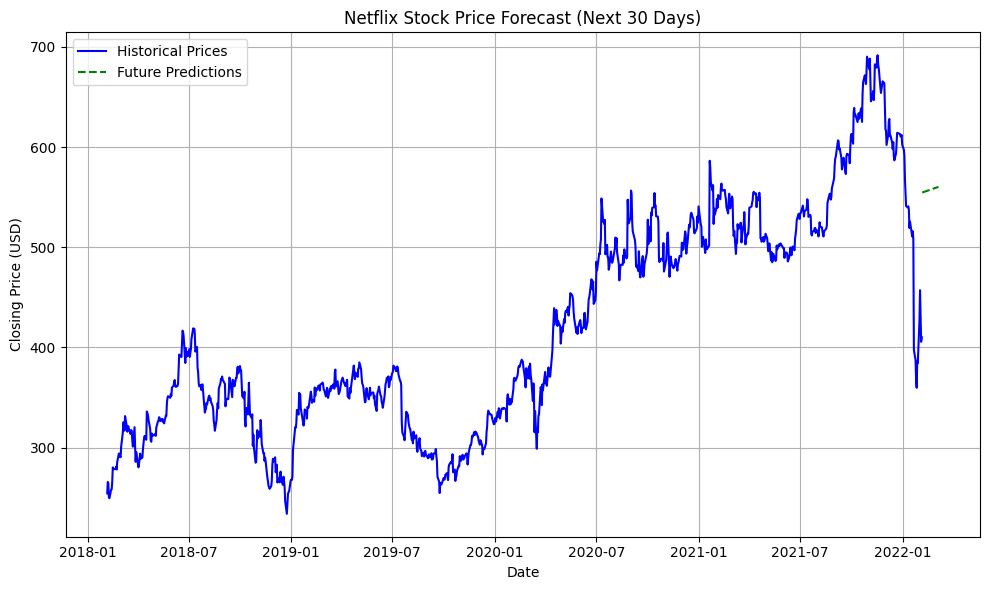

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], y, label='Historical Prices', color='blue')
plt.plot(future_dates, future_predictions, label='Future Predictions', color='green', linestyle='dashed')
plt.title("Netflix Stock Price Forecast (Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
future_df = pd.DataFrame({'Date': future_dates, 'Predicted_Close': future_predictions.flatten()})
print(future_df.head(10))  # Show first 10 predictions

        Date  Predicted_Close
0 2022-02-05       554.654531
1 2022-02-06       554.848758
2 2022-02-07       555.042986
3 2022-02-08       555.237213
4 2022-02-09       555.431440
5 2022-02-10       555.625668
6 2022-02-11       555.819895
7 2022-02-12       556.014123
8 2022-02-13       556.208350
9 2022-02-14       556.402577
